In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
from matplotlib import cm
import time

In [2]:
def gradient(x,delta):
    grad=np.zeros(2)
    grad[0]=(f([x[0]+delta,x[1]])- f([x[0]-delta,x[1]]))/(2*delta)
    grad[1]=(f([x[0],x[1]+delta])- f([x[0],x[1]-delta]))/(2*delta)
    return grad

In [3]:
def f(x):
    fx = 100*(np.sqrt(x[0]**2+(x[1]+1)**2)-1)**2 + 90*(np.sqrt(x[0]**2+(x[1]+1)**2)-1)**2 -(20*x[0]+40*x[1])
    return fx

In [4]:
def golden(x,search,xi,eps):
    a = xi[0];
    b = xi[1];
    tau = 0.381967;
    alpha1 = a*(1-tau) + b*tau;
    alpha2 = a*tau + b*(1-tau);
    falpha1 = f(x+alpha1*search);
    falpha2 = f(x+alpha2*search);
    for i in range(100):
        if falpha1 > falpha2:
            a = alpha1;
            alpha1 = alpha2;
            falpha1 = falpha2;
            alpha2 = tau*a + (1-tau)*b;
            falpha2 = f(x+alpha2*search);
        else:
            b = alpha2;
            alpha2 = alpha1;
            falpha2 = falpha1;
            alpha1 = tau*b + (1-tau)*a;
            falpha1 = f(x+alpha1*search);

        if np.abs(f(x+alpha1*search)- f(x+alpha2*search)) < eps :
            break;
    return alpha1,falpha1

In [5]:
X1 = np.arange(-1, 1, 0.01)
X2 = np.arange(-1, 1, 0.01)
x1, x2 = np.meshgrid(X1, X2)

z = f([x1,x2])
t = time.time()


(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
[0.49504042 0.00320838]
-7.3520544976094


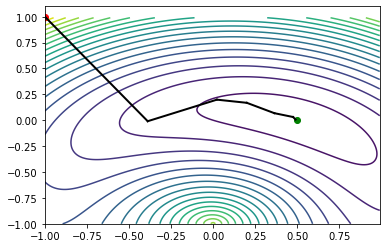

In [6]:
plt.contour(x1,x2,z,20)
plt.plot(-1,1, 'ro--',  markersize=6)
plt.plot(0.5,0, 'go--', markersize=6)

delta=1e-3
eps=1e-3
xi = [-1,1]
x = xi
Bi=np.eye(len(x))

fx_prev=f(x)

iteraciones = 50


for j in range(iteraciones):
    if j==0:
        Gx = gradient(x,delta)
        S = -Gx
        alpha,fx_prev = golden(x,S,xi,eps)
        
        if LA.norm(Gx)<eps:
            break
        xii= x +  alpha*S
        
    else:
        
        deltax=xii-x
        Gxi=gradient(xii,delta) #Gradiente para calcular la aproximada de la hessiana 
        
        Gi = Gxi-Gx
        ter1= np.matmul(np.atleast_2d(deltax).transpose(),np.atleast_2d(deltax) ) /   np.matmul(Gi,deltax.transpose() )
        ter2= np.matmul (np.matmul (np.matmul(Bi, np.atleast_2d(Gi).transpose()), np.atleast_2d(Gi)),Bi) / np.matmul(np.matmul(np.atleast_2d(Gi),Bi ), np.atleast_2d(Gi).transpose())
        
        Bi = Bi + ter1 - ter2
        si=np.matmul(-Bi,Gxi.transpose()) #calcula la nueva dirección con el Hessiano arox
        
        si=np.ndarray.flatten(si.transpose()) #en un solo vector 
        print(si.shape)
        alpha,fx_curr = golden(xii[:],si,xi,eps)
        
        if abs(fx_curr-fx_prev)<eps or LA.norm(xii)<eps:
            break
            
        fx_prev=fx_curr
        Gx = Gxi
        plt.plot([x[0],xii[0]],[x[1],xii[1]], 'k', linewidth=2)
        x=xii
        
        xii = x +  alpha*si
    
print(xii)
print(f(xii))